<h1 style="color:rgb(0,120,170)">ICA</h1>

The cumulant-generating function $K(t)$ of a random variable $X$ is defined as 
the natural logarithm of the moment-generating function
\begin{equation}
  \newcommand\E{\operatorname{\mathbb{E}}}
  \newcommand\dif{\mathrm{d}}
  K(t) = \log \E\left[e^{tX}\right]. 
\end{equation}
Let $\kappa_n = K^{(n)}(0)$ the $n$-th derivative of $K(t)$ evaluated at $t=0$, 
then the Maclaurin series is 
\begin{equation}
  K(t) = \sum_{n=1}^\infty \kappa_n \frac{t^n}{n!}. 
\end{equation}

<h2 style="color:rgb(0,120,170)">Task 1</h2>
Show that if the random variables $X$ and $Y$ are independent then 
$\kappa_n(X+Y) = \kappa_n(X) + \kappa_n(Y)$ and $\kappa_n(\alpha X) = \alpha^n \kappa_n(X)$
holds. 

########## YOUR SOLUTION HERE ##########

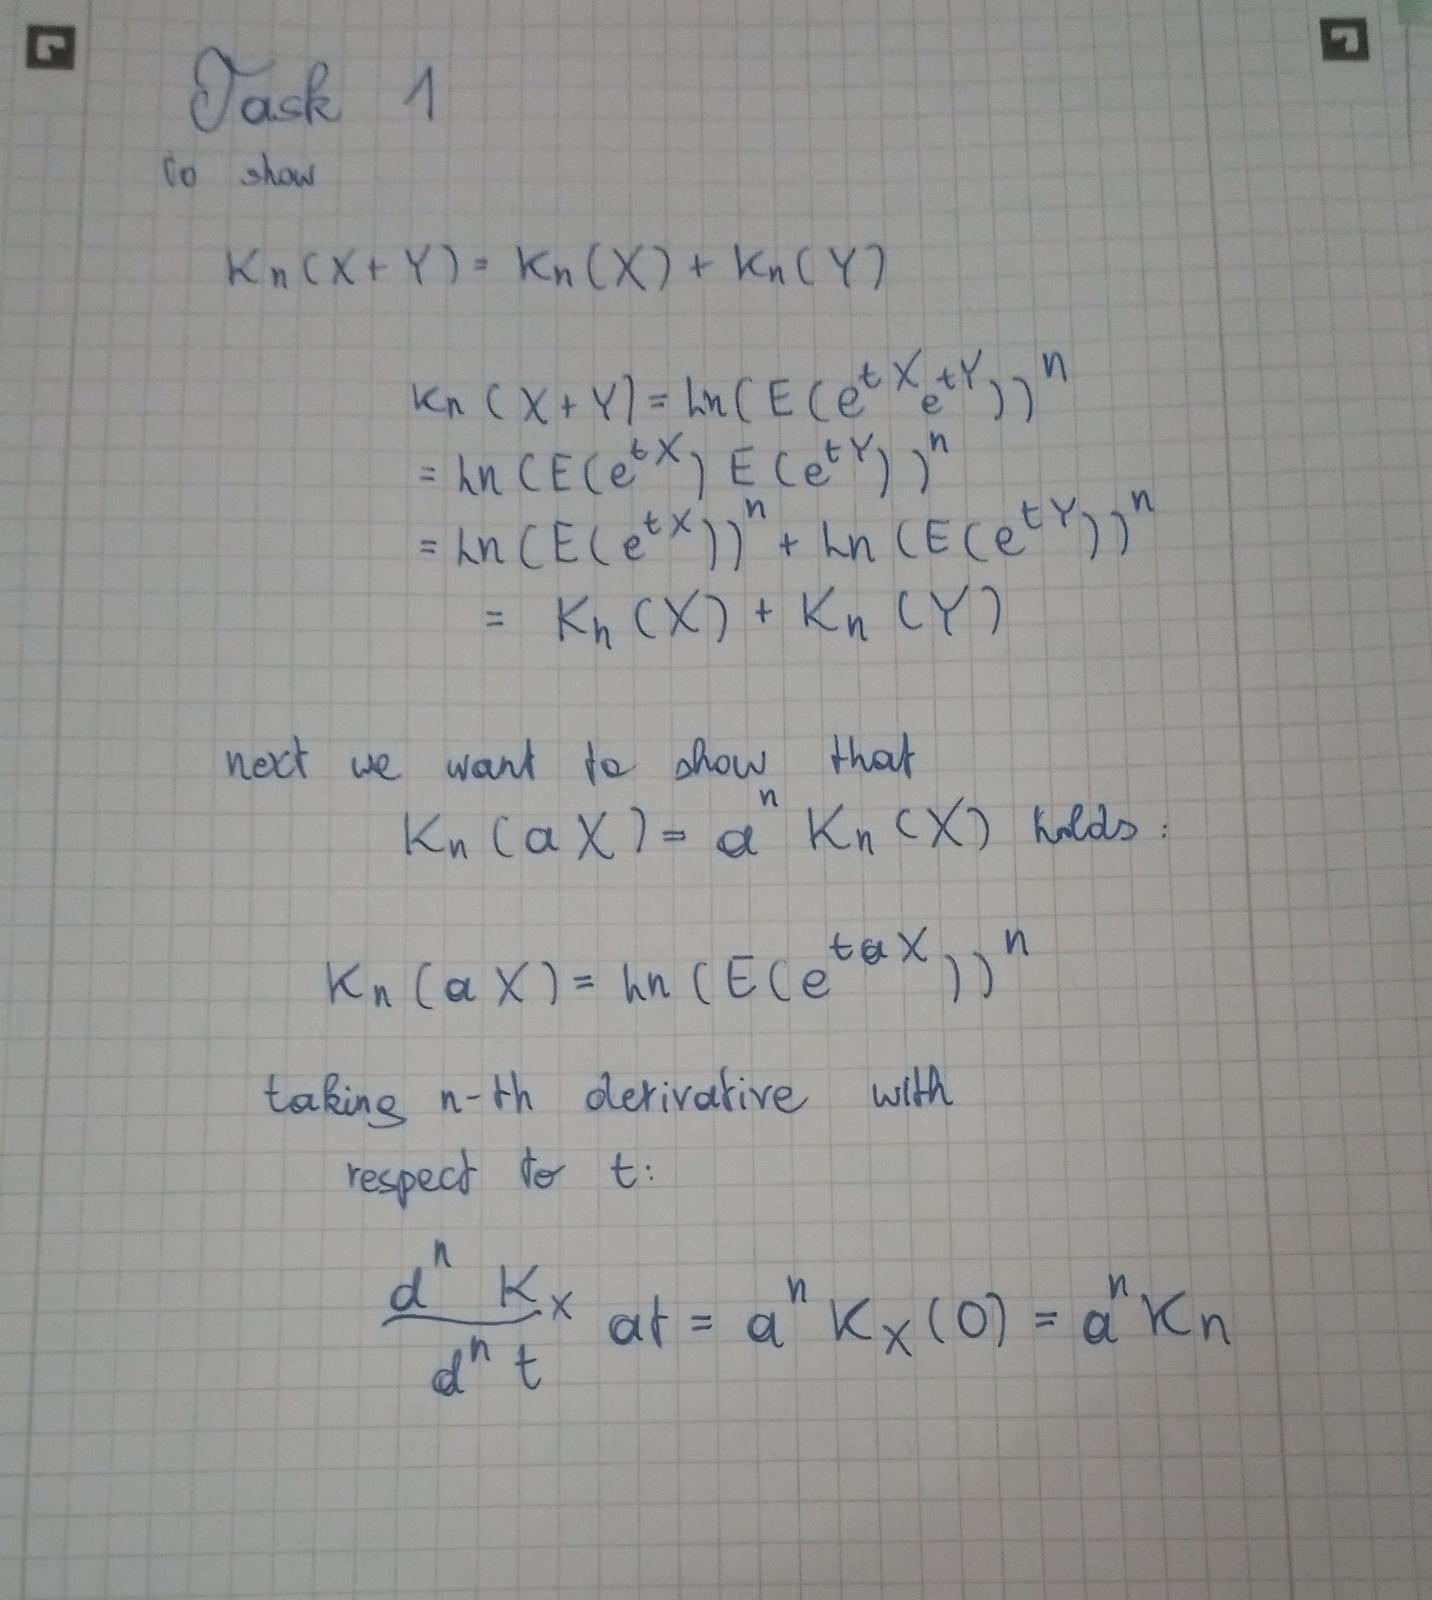

<h2 style="color:rgb(0,120,170)">Task 2</h2>

Show that the first four cumulants of a centered random variable $X$, i.e. $\E[X] = 0$, are 
  \begin{equation}
    \kappa_1 = 0,\quad\kappa_2 = \E[X^2],\quad\kappa_3 = \E[X^3],\quad\text{and}\quad\kappa_4 = \E[X^4] - 3(\E[X^2])^2,
  \end{equation}
respectively. *Hint:* Combine the Taylor expansions $\E[e^{tX}] = \sum_{n=0}^\infty \E[X^n]\frac{t^n}{n!}$ and $\log(1 + a) = \sum_{n=1}^\infty a^n \frac{(-1)^{n+1}}{n}$ and drop all terms of order higher than 4. 

########## YOUR SOLUTION HERE ##########

<h2 style="color:rgb(0,120,170)">Task 3</h2>

Consider a standard normal random variable $X \sim p(x) = \frac{1}{\sqrt{2\pi}} e^{-\frac{x^2}{2}}$. Show that $\E[X] = 0$ and $\E[X^n] = (n-1) \E[X^{n-2}]$ for $n \geq 2$ and use this to determine the third and fourth cumulants of $X$. *Hint:* Use the fact that $\int f'(x) e^{f(x)} \dif x = e^{f(x)}$. 

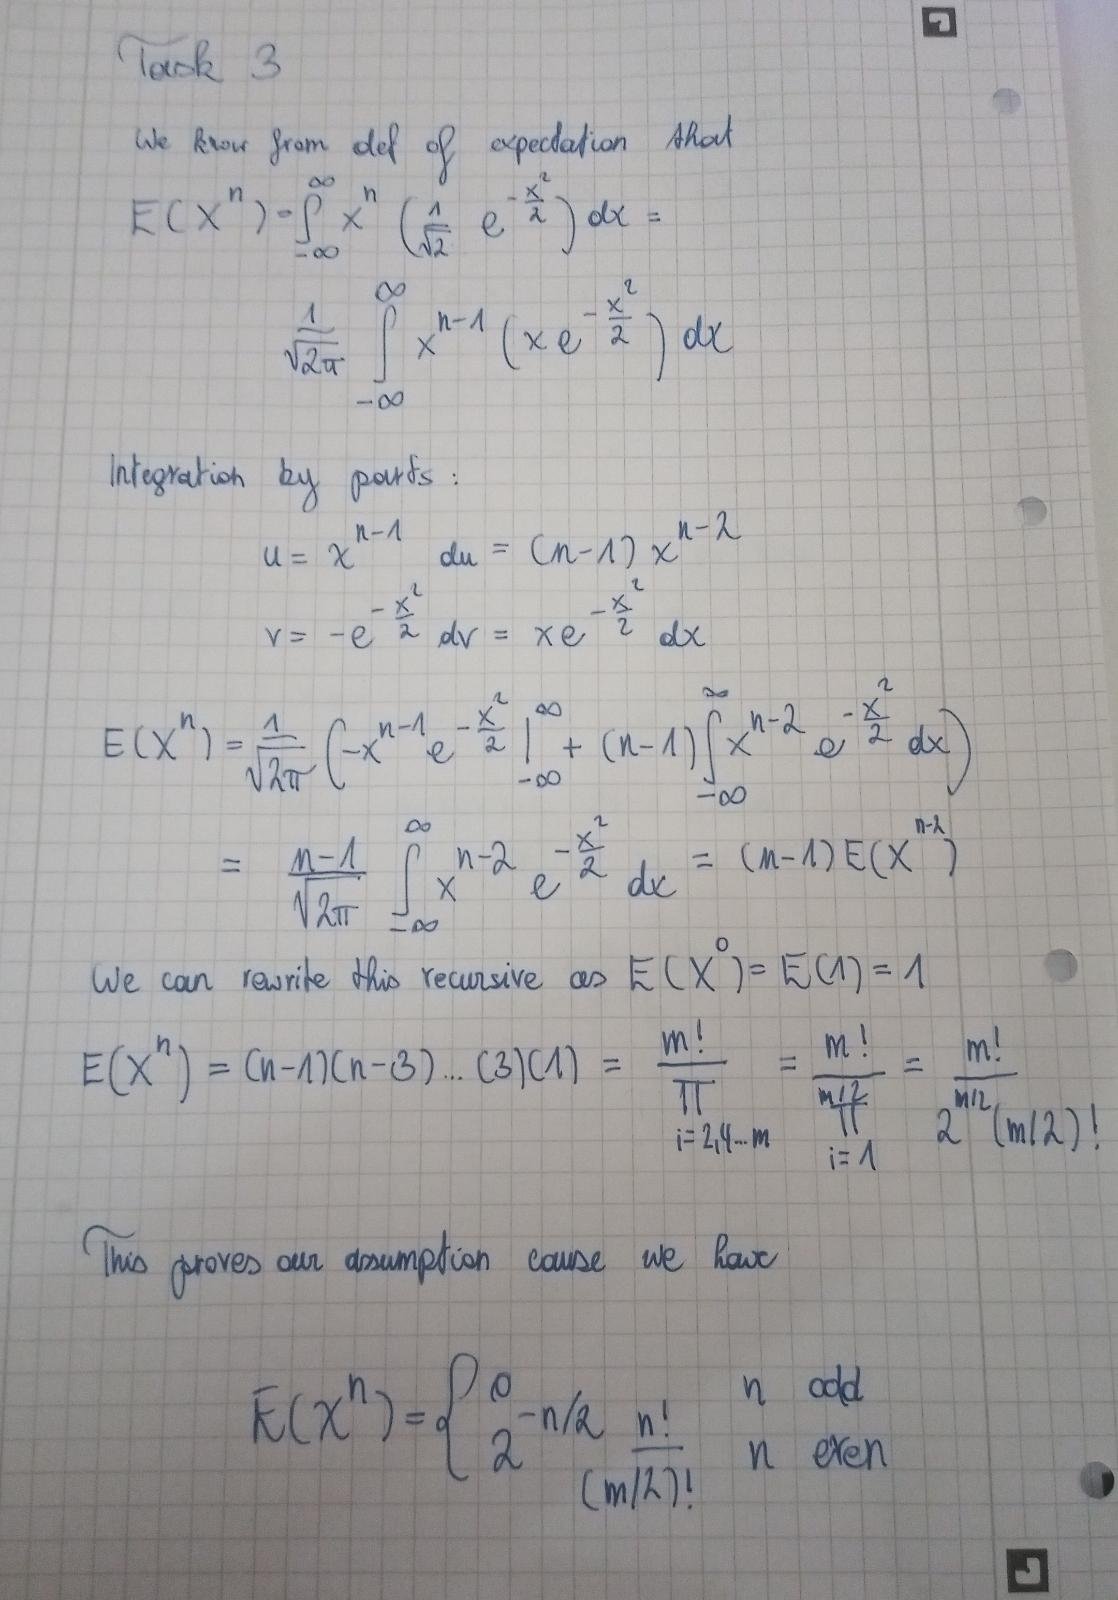

<h2 style="color:rgb(0,120,170)">Task 4</h2>

Compare PCA and ICA at the example of the `cifar-10.npy` dataset. Load the dataset, perform PCA and ICA using the implementations of the `sklearn.decomposition` package with 100 components each. Then visualize the components extracted by the two methods using the provided functions `show_image` and `scale`. What differences do you observe and how do they relate to the properties of PCA and ICA? 

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA, FastICA

def scale(s, a=0, b=1):
    return (b - a) * (s - s.min()) / (s.max() - s.min()) + a

def show_image(img):
    plt.imshow(img.reshape(3, 32, 32).transpose((1, 2, 0)))

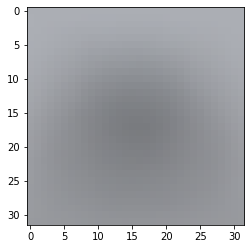

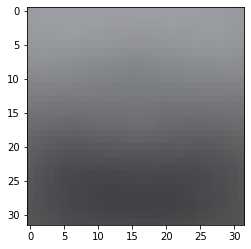

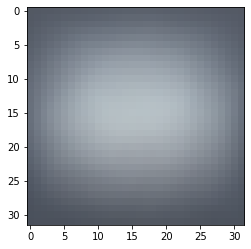

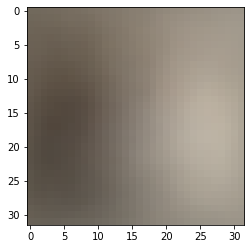

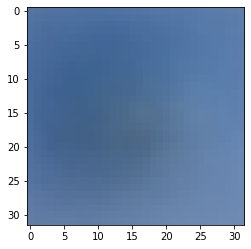

In [2]:
data = np.load("cifar-10.npy")
pca = PCA(n_components=100)
data_pca = pca.fit_transform(data)
components = pca.components_
scaled_components = scale(components)
for i in range(5):
    show_image(scaled_components[i,:])
    plt.show()

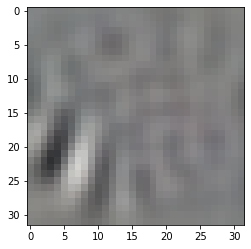

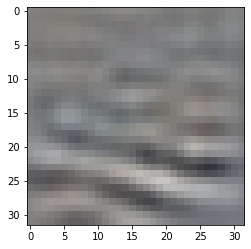

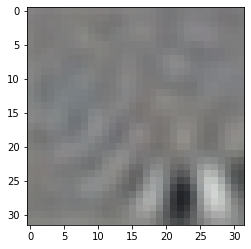

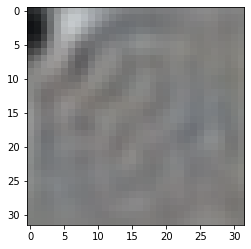

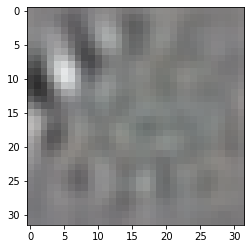

In [11]:
ica = FastICA(n_components=100)
data_ica = ica.fit_transform(data)
components = ica.components_
scaled_components = scale(components)
for i in range(5):
    show_image(scaled_components[i,:])
    plt.show()

## Observations:
---


- Principal components describe the variance of the data and plotting the components results in images which are downscaled such that no contours or variety of colors can be seen.

- Independent components filters the features of the data and plotting the components results in images where the contours can be seen which are features of the objects.


+ PCA looks gaussian distributed,evident in the first few components: for each feature concentration of color at  a region and  blurring around it while ICA components look non gaussian.

<h2 style="color:rgb(0,120,170)">Task 5</h2>

Consider the cocktail party problem. Read the left channel of the files `birds.wav`, `ocean.wav`, `frogs.wav` using the `scipy.io.wavfile` package. Then construct a full-rank $3 \times 3$ mixing matrix and produce 3 different mixings of those signals. You can listen to them using the `sounddevice` package. Finally, use `FastICA` from the `sklearn.decomposition` package to recover the original sources. Listen to the recovered sources and compare them to the originals to check if ICA was successful. *Hint:* Scale the signals to $[-1,1]$ before playing them. 

In [4]:
import scipy.io.wavfile
import sounddevice as sd

########## YOUR SOLUTION HERE ##########

srate_birds, birds = scipy.io.wavfile.read("birds.wav")
srate_ocean, ocean = scipy.io.wavfile.read("ocean.wav")
srate_frogs, frogs = scipy.io.wavfile.read("frogs.wav")

In [5]:
sd.play(frogs)
sd.play(ocean)
sd.play(birds)

In [6]:
S = np.c_[birds[:,0], ocean[:,0], frogs[:,0]]
A = np.array([[1, 1, 1], [0.5, 2, 1.0], [1.5, 1.0, 2.0]]) # Mixing matrix
X = np.dot(S, A.T) 

In [7]:
ica = FastICA(n_components=3)
S_ = ica.fit_transform(X)  # Reconstruct signals
A_ = ica.mixing_  # Get estimated mixing matrix

In [8]:
np.allclose(X, np.dot(S_, A_.T) + ica.mean_)

True

In [9]:
sd.play(S_[:,0]) # Reconstructed frog
sd.play(S_[:,1]) # Reconstructed ocean
sd.play(S_[:,2]) # Reconstructed birds